In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro
import statsmodels.formula.api as smf
sns.set_style('whitegrid')

In [ ]:
path = 'drive/My Drive/Colab Notebooks/MATH3450-Sp23/sleuth3csv/case0802.csv'
df = pd.read_csv(path)
df.head()

,Time,Voltage,Group
0,5.79,26,Group1
1,1579.52,26,Group1
2,2323.70,26,Group1
3,68.85,28,Group2
4,108.29,28,Group2


In [ ]:
df

,Time,Voltage,Group
0,5.79,26,Group1
1,1579.52,26,Group1
2,2323.70,26,Group1
3,68.85,28,Group2
4,108.29,28,Group2
...,...,...,...
71,0.73,38,Group7
72,0.74,38,Group7
73,1.13,38,Group7
74,1.40,38,Group7


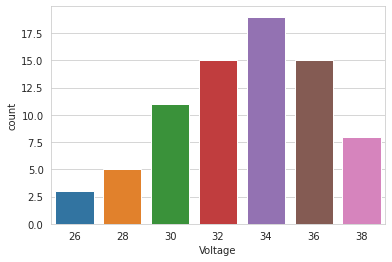

In [ ]:
sns.countplot(x=df["Voltage"])
plt.show()

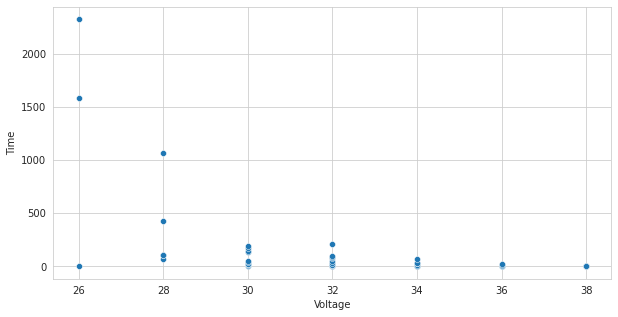

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Voltage', y='Time', data=df)
plt.show()

In [ ]:
model = smf.ols("Time ~ Voltage", data = df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     24.27
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           4.97e-06
Time:                        19:21:32   Log-Likelihood:                -539.72
No. Observations:                  76   AIC:                             1083.
Df Residuals:                      74   BIC:                             1088.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1886.1695    364.481      5.175      0.0

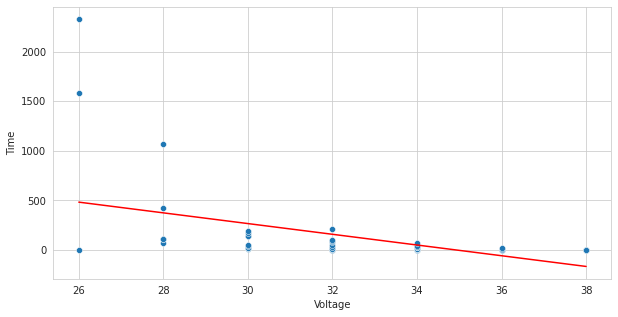

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x='Voltage', y='Time', data=df, ax=ax)
pred = results.predict(df['Voltage'])
plt.plot(df.Voltage, pred, color='red')
plt.show()

In [ ]:
results.resid

0     -477.551536
1     1096.178464
2     1840.358464
3     -306.581696
4     -267.141696
         ...     
71     164.847506
72     164.857506
73     165.247506
74     165.517506
75     166.497506
Length: 76, dtype: float64

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


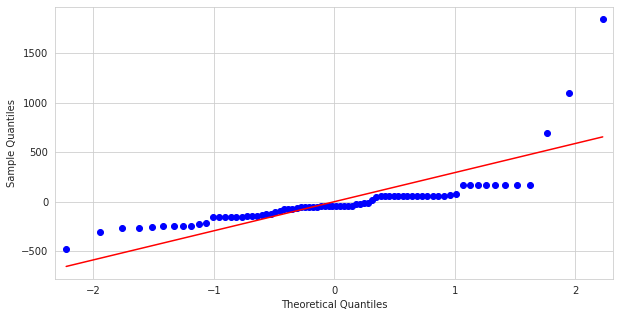

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sm.qqplot(results.resid, line='s', ax=ax);
plt.show()

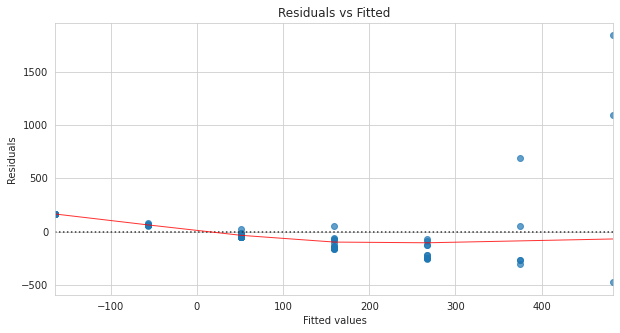

In [ ]:
plt.figure(figsize=(10,5))

# fitted values (predicted values)
model_fitted_y = results.fittedvalues

#  Plot
plot = sns.residplot(x=model_fitted_y, y='Time', data=df, lowess=True, 
                     scatter_kws={'alpha': 0.7}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');

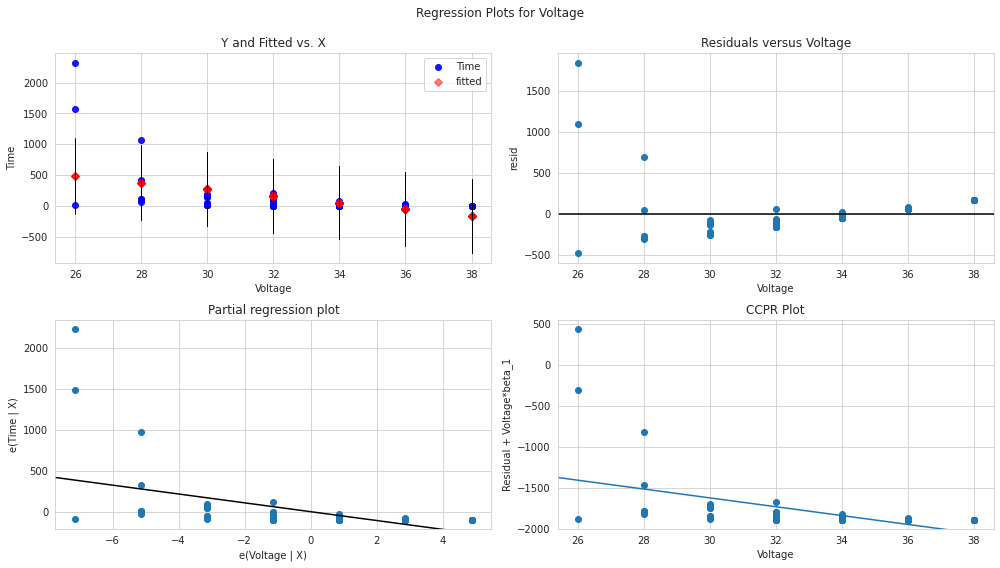

In [ ]:
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(results,
                                    'Voltage',
                                    fig=fig)

In [ ]:
shapiro(results.resid)

ShapiroResult(statistic=0.615009069442749, pvalue=8.210021204546614e-13)

# Log Transform Time (response variable)

In [ ]:
df["logTime"] = np.log(df["Time"])
df.head()

,Time,Voltage,Group,logTime
0,5.79,26,Group1,1.756132
1,1579.52,26,Group1,7.364876
2,2323.70,26,Group1,7.750916
3,68.85,28,Group2,4.231930
4,108.29,28,Group2,4.684813


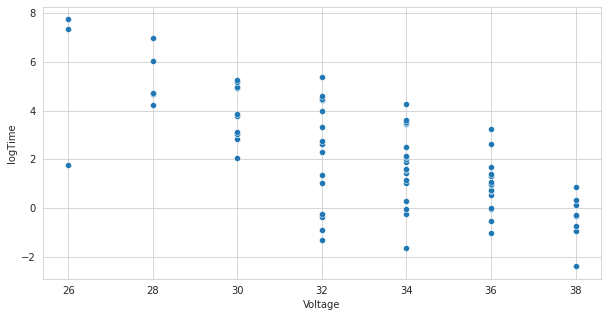

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Voltage', y='logTime', data=df)
plt.show()

In [ ]:
model = smf.ols("logTime ~ Voltage", data = df)
logresults = model.fit()
print(logresults.summary())

                            OLS Regression Results                            
Dep. Variable:                logTime   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     78.14
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           3.34e-13
Time:                        06:22:57   Log-Likelihood:                -140.62
No. Observations:                  76   AIC:                             285.2
Df Residuals:                      74   BIC:                             289.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.9555      1.910      9.924      0.0

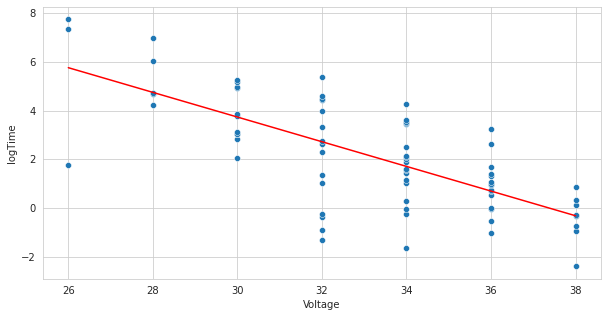

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x='Voltage', y='logTime', data=df, ax=ax)
pred = logresults.predict(df['Voltage'])
plt.plot(df.Voltage, pred, color='red')
plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


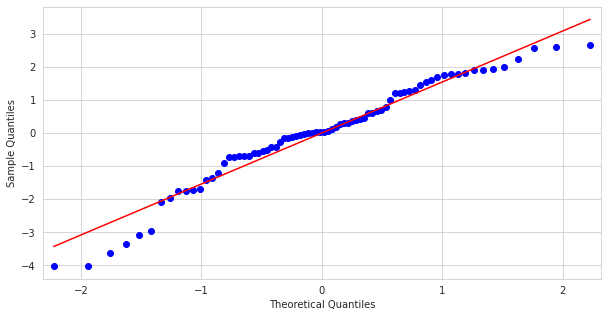

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sm.qqplot(logresults.resid, line='s', ax=ax);
plt.show()

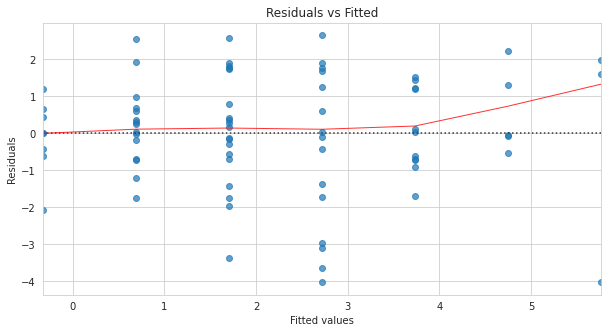

In [ ]:
plt.figure(figsize=(10,5))

# fitted values (predicted values)
model_fitted_y = logresults.fittedvalues

#  Plot
plot = sns.residplot(x=model_fitted_y, y='logTime', data=df, lowess=True, 
                     scatter_kws={'alpha': 0.7}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');

In [ ]:
shapiro(logresults.resid)

ShapiroResult(statistic=0.9567599296569824, pvalue=0.011155957356095314)

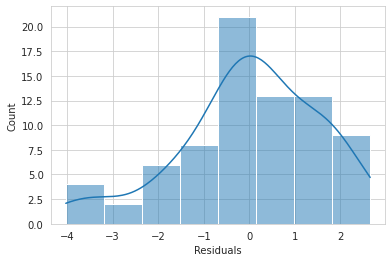

In [ ]:
res = pd.Series(logresults.resid, name = "Residuals")

sns.histplot(data=res, kde=True)
plt.show()

## Island area and Number of Species -  An observational study 

In [ ]:
path = 'drive/My Drive/Colab Notebooks/MATH3450-Sp23/sleuth3csv/case0801.csv'
df = pd.read_csv(path)
df.head()

,Area,Species
0,44218,100
1,29371,108
2,4244,45
3,3435,53
4,32,16


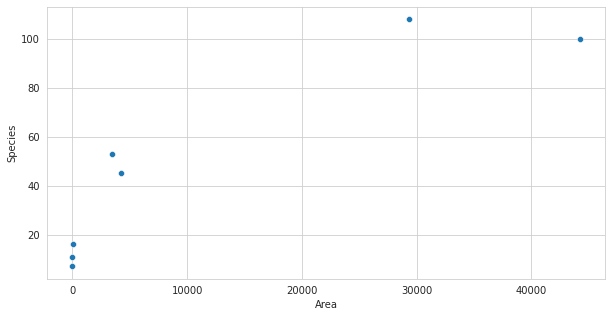

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Area", y="Species", data=df)
plt.show()

In [ ]:
model = smf.ols("Species ~ Area", data = df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Species   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     22.02
Date:                Fri, 17 Mar 2023   Prob (F-statistic):            0.00537
Time:                        19:34:16   Log-Likelihood:                -29.593
No. Observations:                   7   AIC:                             63.19
Df Residuals:                       5   BIC:                             63.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0493      9.074      2.650      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


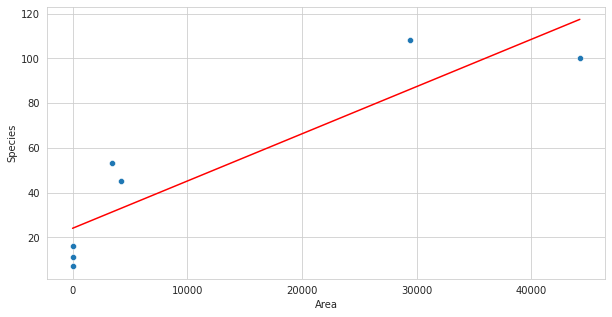

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x='Area', y='Species', data=df, ax=ax)
pred = results.predict(df['Area'])
plt.plot(df['Area'], pred, color='red')
plt.show()

In [ ]:
df['logArea'] = np.log(df['Area'])

In [ ]:
df.head()

,Area,Species,logArea
0,44218,100,10.696887
1,29371,108,10.287763
2,4244,45,8.353261
3,3435,53,8.141772
4,32,16,3.465736


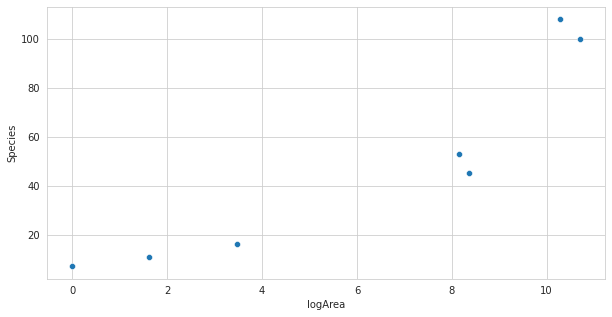

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="logArea", y="Species", data=df)
plt.show()

In [ ]:
model = smf.ols("Species ~ logArea", data = df)
logresults1 = model.fit()
print(logresults1.summary())

                            OLS Regression Results                            
Dep. Variable:                Species   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     27.55
Date:                Fri, 17 Mar 2023   Prob (F-statistic):            0.00333
Time:                        19:37:54   Log-Likelihood:                -28.942
No. Observations:                   7   AIC:                             61.88
Df Residuals:                       5   BIC:                             61.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.2940     12.288     -0.431      0.6

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


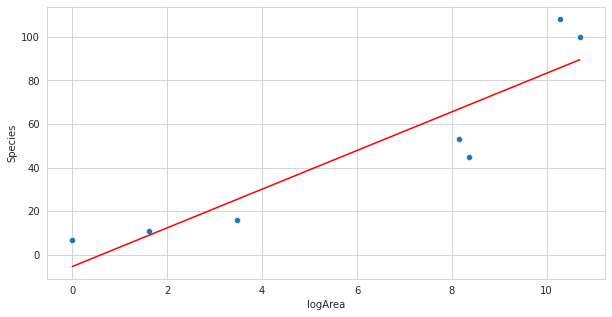

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x='logArea', y='Species', data=df, ax=ax)
pred = logresults1.predict(df['logArea'])
plt.plot(df['logArea'], pred, color='red')
plt.show()

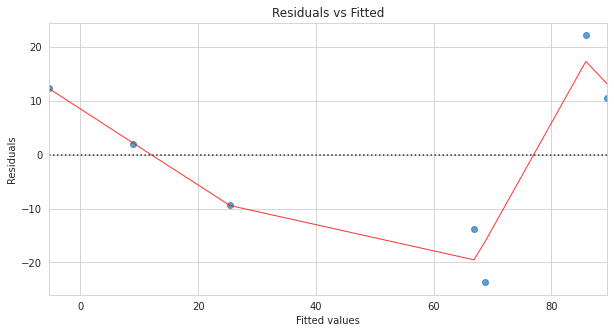

In [ ]:
plt.figure(figsize=(10,5))

# fitted values (predicted values)
model_fitted_y = logresults1.fittedvalues

#  Plot
plot = sns.residplot(x=model_fitted_y, y='Species', data=df, lowess=True, 
                     scatter_kws={'alpha': 0.7}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');

In [ ]:
df['logSpecies'] = np.log(df['Species'])

In [ ]:
df.head()

,Area,Species,logArea,logSpecies
0,44218,100,10.696887,4.605170
1,29371,108,10.287763,4.682131
2,4244,45,8.353261,3.806662
3,3435,53,8.141772,3.970292
4,32,16,3.465736,2.772589


In [ ]:
model = smf.ols("logSpecies ~ logArea", data = df)
logresults2 = model.fit()
print(logresults2.summary())

                            OLS Regression Results                            
Dep. Variable:             logSpecies   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     425.3
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           4.96e-06
Time:                        19:42:30   Log-Likelihood:                 5.6211
No. Observations:                   7   AIC:                            -7.242
Df Residuals:                       5   BIC:                            -7.350
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9365      0.088     21.973      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


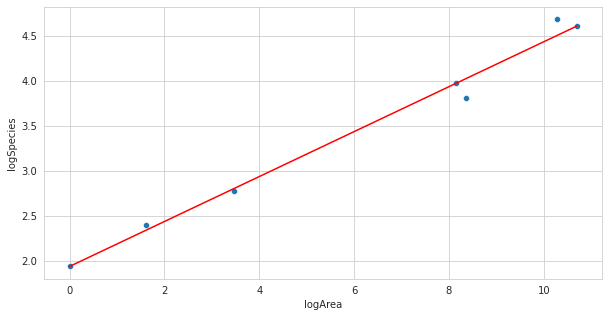

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x='logArea', y='logSpecies', data=df, ax=ax)
pred = logresults2.predict(df['logArea'])
plt.plot(df['logArea'], pred, color='red')
plt.show()

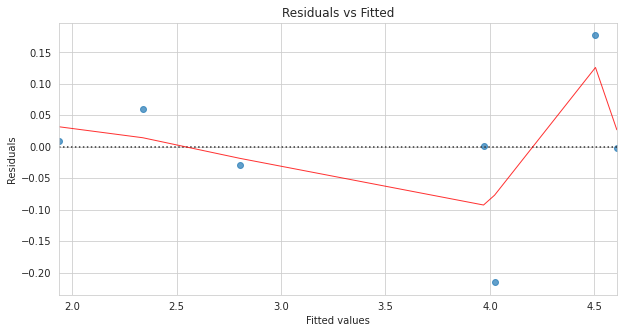

In [ ]:
plt.figure(figsize=(10,5))

# fitted values (predicted values)
model_fitted_y = logresults2.fittedvalues

#  Plot
plot = sns.residplot(x=model_fitted_y, y='logSpecies', data=df, lowess=True, 
                     scatter_kws={'alpha': 0.7}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');

In [ ]:
shapiro(logresults2.resid)

ShapiroResult(statistic=0.9066542387008667, pvalue=0.37319305539131165)

# Lack-of-fit F-test

In [ ]:
path = 'drive/My Drive/Colab Notebooks/MATH3450-Sp23/sleuth3csv/case0802.csv'
df = pd.read_csv(path)
df.head()

,Time,Voltage,Group
0,5.79,26,Group1
1,1579.52,26,Group1
2,2323.70,26,Group1
3,68.85,28,Group2
4,108.29,28,Group2


In [ ]:
df['logTime'] = np.log(df['Time'])

In [ ]:
model = smf.ols("logTime ~ Voltage", data = df)
logresults = model.fit()
print(logresults.summary())

                            OLS Regression Results                            
Dep. Variable:                logTime   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     78.14
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           3.34e-13
Time:                        20:20:29   Log-Likelihood:                -140.62
No. Observations:                  76   AIC:                             285.2
Df Residuals:                      74   BIC:                             289.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.9555      1.910      9.924      0.0

In [ ]:
from statsmodels.stats.anova import anova_lm

In [ ]:
# Perform analysis of variance on fitted linear model
anova_results = anova_lm(logresults)

print('\nANOVA results')
print(anova_results)


ANOVA results
            df      sum_sq     mean_sq          F        PR(>F)
Voltage    1.0  190.151491  190.151491  78.140903  3.340072e-13
Residual  74.0  180.074836    2.433444        NaN           NaN


In [ ]:
SSR_LR = anova_results.loc["Residual","sum_sq"]
df_LR = anova_results.loc["Residual","df"]
print(f'SSR_LR = {SSR_LR}, df_LR = {df_LR}')

SSR_LR = 180.07483614589412, df_LR = 74.0


In [ ]:
# Ordinary Least Squares (OLS) model
model = smf.ols('logTime ~ C(Voltage)', data=df).fit()
anova_table = anova_lm(model, typ=1)
anova_table
# output (ANOVA F and p value)

,df,sum_sq,mean_sq,F,PR(>F)
C(Voltage),6.0,196.477407,32.746234,13.004341,8.871300e-10
Residual,69.0,173.748921,2.518100,NaN,NaN


In [ ]:
SSR_SM = anova_table.loc['Residual', 'sum_sq']
df_SM = anova_table.loc['Residual', 'df']
print(f'SSR_SM = {SSR_SM}, df_SM = {df_SM}')

SSR_SM = 173.74892059616758, df_SM = 69.0


In [ ]:
f_stat = ((SSR_LR - SSR_SM)/(df_LR-df_SM))/(SSR_SM/df_SM)
print(f'F_statistic = ', f_stat)

F_statistic =  0.5024355506019291


In [ ]:
from scipy.stats import f
pValue = 1 - f.cdf(f_stat,df_LR-df_SM,df_SM)
print(pValue)

0.7733949142944713


This large p-value provides no evidence of lack-of-fit to the simple linear regression model.